In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
#Lectura del archivo
df_properatti=pd.read_csv('properatti.csv')

In [3]:
df_properatti_final=df_properatti[['property_type', 'place_name',
       'place_with_parent_names', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'description', 'title']]

In [4]:
df_properatti_final.rename(columns={'property_type':'Tipo propiedad', 'place_name':'Localidad',
                                    'place_with_parent_names':'Ubicación completa', 'state_name':'Provincia',
                                    'geonames_id':'Ubicación id','price':'Precio', 'currency':'Moneda',
                                    'price_aprox_local_currency':'Precio aprox moneda local', 
                                    'price_aprox_usd':'Precio aprox USD', 'surface_total_in_m2':'M2 totales',
                                    'surface_covered_in_m2':'M2 cubiertos', 'price_usd_per_m2':'USD por m2 total',
                                    'price_per_m2':'USD por m2 cubierto', 'floor':'Piso',
                                    'rooms':'Ambientes','expenses':'Expensas','description':'Descripción',
                                    'title':'Título'},
                           inplace=True)
df_properatti_final.head()

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Tipo propiedad,Localidad,Ubicación completa,Provincia,Ubicación id,lat-lon,lat,lon,Precio,Moneda,...,Precio aprox USD,M2 totales,M2 cubiertos,USD por m2 total,USD por m2 cubierto,Piso,Ambientes,Expensas,Descripción,Título
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,62000.0,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,...,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,...,72000.0,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO
3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,...,95000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado
4,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,...,64000.0,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...


In [5]:
#Se eliminan los duplicados, se entiende que si dos filas son completamente iguales, se trata de la misma propiedad 
df_properatti_final=df_properatti_final.drop_duplicates()
df_properatti_final.shape

(116140, 21)

In [6]:
#Se analizan los NULL
df_properatti_final['USD por m2 cubierto'].isnull().sum()

30443

In [7]:
#Análisis descriptivo. Hay datos que están mal. Tanto la media como el desvío son muy altos para valores de 
#precio por m2
df_properatti_final['USD por m2 cubierto'].describe()

count    8.569700e+04
mean     6.806799e+03
std      2.849538e+04
min      1.510204e+00
25%      1.538462e+03
50%      2.200000e+03
75%      3.333333e+03
max      4.000000e+06
Name: USD por m2 cubierto, dtype: float64

In [8]:
#Se trabaja con una tabla sin valores de M2 cubiertos=0 ni Nan para evitar errores en las fórmulas al hacer correcciones
properatti_prov=df_properatti_final[['Tipo propiedad','Ubicación completa','Precio','Precio aprox USD','M2 totales',
                         'USD por m2 total','M2 cubiertos',
                         'USD por m2 cubierto']].loc[(df_properatti_final['USD por m2 cubierto'].isnull()==False)
                                                    & (df_properatti_final['Precio aprox USD'].isnull()==False)
                                                    & (df_properatti_final['Precio aprox USD']!=0)]
properatti_prov.head()

,Tipo propiedad,Ubicación completa,Precio,Precio aprox USD,M2 totales,USD por m2 total,M2 cubiertos,USD por m2 cubierto
0,PH,|Argentina|Capital Federal|Mataderos|,62000.0,62000.0,55.0,1127.272727,40.0,1550.000000
2,apartment,|Argentina|Capital Federal|Mataderos|,72000.0,72000.0,55.0,1309.090909,55.0,1309.090909
4,apartment,|Argentina|Buenos Aires Costa Atlántica|Mar de...,64000.0,64000.0,35.0,1828.571429,35.0,1828.571429
6,PH,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,130000.0,130000.0,106.0,1226.415094,78.0,1666.666667
7,apartment,|Argentina|Capital Federal|Belgrano|,138000.0,138000.0,45.0,3066.666667,40.0,3450.000000


In [9]:
#Se detectó que los valores de USD por m2 cubiertos están calculados con la columna Precio, se había analizado que esa
#columna tenía datos en moneda loca, la columna de precio que corresponde a dólares es Precio aprox USD:
#Se define df4 para analizar los casos en los que Precio es diferente a PRecio aprox USD
df4=properatti_prov.loc[properatti_prov['Precio']!=properatti_prov['Precio aprox USD']]
df4.shape

(9977, 8)

In [10]:
#Se analizan los casos en los que el valor del M2 cubierto está calculado como Precio/M2 cubiertos. Sn todos!
df4.loc[(round(df4['USD por m2 cubierto'],2)==round((df4['Precio']/df4['M2 cubiertos']),2))==True].shape

(9977, 8)

In [11]:
#Se corrige la columna de USD por m2 cubierto con la fórmula que corresponde. Se corrige en propetati_prov para que no haya
#error en las fórmulas por 0 o Nan. Y se corrige únicamente en las columnas donde Precio es diferente a Precio aprox USD

properatti_prov['USD por m2 cub. corregido'] = np.where(properatti_prov['Precio']!=properatti_prov['Precio aprox USD'],
                                                         properatti_prov['Precio aprox USD']/properatti_prov['M2 cubiertos'],
                                                         properatti_prov['USD por m2 cubierto'])
properatti_prov.head()

,Tipo propiedad,Ubicación completa,Precio,Precio aprox USD,M2 totales,USD por m2 total,M2 cubiertos,USD por m2 cubierto,USD por m2 cub. corregido
0,PH,|Argentina|Capital Federal|Mataderos|,62000.0,62000.0,55.0,1127.272727,40.0,1550.000000,1550.000000
2,apartment,|Argentina|Capital Federal|Mataderos|,72000.0,72000.0,55.0,1309.090909,55.0,1309.090909,1309.090909
4,apartment,|Argentina|Buenos Aires Costa Atlántica|Mar de...,64000.0,64000.0,35.0,1828.571429,35.0,1828.571429,1828.571429
6,PH,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,130000.0,130000.0,106.0,1226.415094,78.0,1666.666667,1666.666667
7,apartment,|Argentina|Capital Federal|Belgrano|,138000.0,138000.0,45.0,3066.666667,40.0,3450.000000,3450.000000


In [12]:
#Se puede ver que los datos se corrigen en gran medida. De todas formas sigue habiendo valores por fuera de escala que
#claramente son erróneos
properatti_prov['USD por m2 cub. corregido'].describe()

count    8.569700e+04
mean     3.168906e+03
std      1.874710e+04
min      1.510204e+00
25%      1.428571e+03
50%      1.990000e+03
75%      2.754761e+03
max      2.600000e+06
Name: USD por m2 cub. corregido, dtype: float64

In [13]:
properatti_prov2=properatti_prov[['USD por m2 cub. corregido',]]
properatti_prov2.head()

,USD por m2 cub. corregido
0,1550.000000
2,1309.090909
4,1828.571429
6,1666.666667
7,3450.000000


In [14]:
#Antes de continuar se llevan los valores corregidos a la tabla original
df_properatti_final=df_properatti_final.join(properatti_prov2, how='left')
df_properatti_final.head()

,Tipo propiedad,Localidad,Ubicación completa,Provincia,Ubicación id,lat-lon,lat,lon,Precio,Moneda,...,M2 totales,M2 cubiertos,USD por m2 total,USD por m2 cubierto,Piso,Ambientes,Expensas,Descripción,Título,USD por m2 cub. corregido
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,55.0,40.0,1127.272727,1550.000000,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,1550.000000
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,NaN
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,...,55.0,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,1309.090909
3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,NaN
4,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,...,35.0,35.0,1828.571429,1828.571429,NaN,NaN,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,1828.571429


In [15]:
#Se analizan los nuevos valores.Parecen haberse corregido, pero siguen habiendo valore erroneos (precios por m2 de más de 
#4 dígitos y de menos de 3)
df_properatti_final['USD por m2 cub. corregido'].describe()

count    8.569700e+04
mean     3.168906e+03
std      1.874710e+04
min      1.510204e+00
25%      1.428571e+03
50%      1.990000e+03
75%      2.754761e+03
max      2.600000e+06
Name: USD por m2 cub. corregido, dtype: float64

In [16]:
#Se decide hacer una primera corrección de datos basándose en la cantidad de dígitos del precio por m2 cubierto y
#del precio aprox USD. Se define nuevamente la tabla provisoria para comenzar a corregir datos. Dado que la idea 
#es calcular el precio por m2 en función del precios total y los m2, se toman sólo valores que no sean Null ni 0.
properatti_prov=df_properatti_final[['Tipo propiedad','Ubicación completa','Precio','Precio aprox USD','M2 totales',
                         'USD por m2 total','M2 cubiertos',
                         'USD por m2 cub. corregido']].loc[(df_properatti_final['USD por m2 cub. corregido'].isnull()==False)
                                                    & (df_properatti_final['Precio aprox USD'].isnull()==False)
                                                    & (df_properatti_final['Precio aprox USD']!=0)]


In [17]:
properatti_prov.shape

(85697, 8)

In [18]:
properatti_prov.head()

,Tipo propiedad,Ubicación completa,Precio,Precio aprox USD,M2 totales,USD por m2 total,M2 cubiertos,USD por m2 cub. corregido
0,PH,|Argentina|Capital Federal|Mataderos|,62000.0,62000.0,55.0,1127.272727,40.0,1550.000000
2,apartment,|Argentina|Capital Federal|Mataderos|,72000.0,72000.0,55.0,1309.090909,55.0,1309.090909
4,apartment,|Argentina|Buenos Aires Costa Atlántica|Mar de...,64000.0,64000.0,35.0,1828.571429,35.0,1828.571429
6,PH,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,130000.0,130000.0,106.0,1226.415094,78.0,1666.666667
7,apartment,|Argentina|Capital Federal|Belgrano|,138000.0,138000.0,45.0,3066.666667,40.0,3450.000000


In [19]:
#Se agregan las columnas con cantidad de dígitos
properatti_prov['Len USD por m2 cub.']=((round(properatti_prov['USD por m2 cub. corregido'],0).astype(int)).astype(str)).str.len()
properatti_prov['Len precio aprox USD']=((round(properatti_prov['Precio aprox USD'],0).astype(int)).astype(str)).str.len()
properatti_prov.head()

,Tipo propiedad,Ubicación completa,Precio,Precio aprox USD,M2 totales,USD por m2 total,M2 cubiertos,USD por m2 cub. corregido,Len USD por m2 cub.,Len precio aprox USD
0,PH,|Argentina|Capital Federal|Mataderos|,62000.0,62000.0,55.0,1127.272727,40.0,1550.000000,4,5
2,apartment,|Argentina|Capital Federal|Mataderos|,72000.0,72000.0,55.0,1309.090909,55.0,1309.090909,4,5
4,apartment,|Argentina|Buenos Aires Costa Atlántica|Mar de...,64000.0,64000.0,35.0,1828.571429,35.0,1828.571429,4,5
6,PH,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,130000.0,130000.0,106.0,1226.415094,78.0,1666.666667,4,6
7,apartment,|Argentina|Capital Federal|Belgrano|,138000.0,138000.0,45.0,3066.666667,40.0,3450.000000,4,6


In [20]:
#Para continuar, definimos que el valor del precio por m2 tiene que ser de 3 o 4 dígitos. Nos quedamos con los precios
#aprox en dólares de 5 y 6 dígitos y acotamos la cantidad de m2 que puede tener una propiedad en función del tipo de 
#propiedad

In [21]:
properatti_prov['Tipo propiedad'].value_counts()

apartment    50552
house        28126
PH            4498
store         2521
Name: Tipo propiedad, dtype: int64

In [22]:
#Se hace un corte en la cantidad de m2 para los apartment y se ve que la mayoría de los datos están entre 20 y 300 m2 cub.
#Se asume que esos son los datos correctos ya que los extremos podrían estar mal.
corte=pd.cut(properatti_prov[properatti_prov['Tipo propiedad']=='apartment']['M2 cubiertos'],
             [0,10,20,50,100,200,300,500,1000,10000,400000])
corte.value_counts()

(20, 50]           24308
(50, 100]          19457
(100, 200]          5331
(200, 300]           726
(300, 500]           293
(10, 20]             199
(0, 10]              143
(500, 1000]           54
(1000, 10000]         38
(10000, 400000]        3
Name: M2 cubiertos, dtype: int64

In [23]:
#Se hace un corte en la cantidad de m2 para las casas y se ve que la mayoría de los datos están entre 50 y 1000 m2 cub.
#Se asume que esos son los datos correctos ya que los extremos podrían estar mal.
corte=pd.cut(properatti_prov[properatti_prov['Tipo propiedad']=='house']['M2 cubiertos'],
             [0,10,20,50,100,200,300,500,1000,10000,400000])
corte.value_counts()

(100, 200]         11487
(200, 300]          6777
(50, 100]           4074
(300, 500]          3708
(500, 1000]          779
(10, 20]             702
(20, 50]             401
(0, 10]              115
(1000, 10000]         71
(10000, 400000]       12
Name: M2 cubiertos, dtype: int64

In [24]:
#Se hace un corte en la cantidad de m2 para los PH y se ve que la mayoría de los datos están entre 50 y 300 m2 cub.
#Se asume que esos son los datos correctos ya que los extremos podrían estar mal.
corte=pd.cut(properatti_prov[properatti_prov['Tipo propiedad']=='PH']['M2 cubiertos'],
             [0,10,20,50,100,200,300,500,1000,10000,400000])
corte.value_counts()

(50, 100]          2239
(100, 200]         1063
(20, 50]            802
(10, 20]            231
(200, 300]          101
(0, 10]              32
(300, 500]           21
(500, 1000]           5
(1000, 10000]         4
(10000, 400000]       0
Name: M2 cubiertos, dtype: int64

In [25]:
#Se hace un corte en la cantidad de m2 para los locales y se ve que la mayoría de los datos están entre 20 y 1000 m2 cub.
#Se asume que esos son los datos correctos ya que los extremos podrían estar mal.
corte=pd.cut(properatti_prov[properatti_prov['Tipo propiedad']=='store']['M2 cubiertos'],
             [0,10,20,50,100,200,300,500,1000,10000,400000])
corte.value_counts()

(20, 50]           494
(100, 200]         470
(50, 100]          404
(10, 20]           308
(200, 300]         247
(300, 500]         236
(500, 1000]        182
(1000, 10000]      144
(0, 10]             28
(10000, 400000]      8
Name: M2 cubiertos, dtype: int64

In [26]:
#Entonces, para poder corregir datos se asume:
#Los USD por m2 que tienen más de 4 dígitos y menos de 3 son datos incorrectos
#Los precios aprox en USD que tienen menos de 5 dígitos y más de 6 son incorrectos
#Los valores de M2 cubiertos se asumen correctos para los siguientes casos:
#Departamentos: entre 20 y 200 m2 cub.
#Casas: entre 50 y 1000 m2 cub.
#PH: entre 50 y 300 m2 cub.
#Locales: entre 20 y 1000 m2 cub.

In [27]:
properatti_prov=properatti_prov.loc[
     (((properatti_prov['Len USD por m2 cub.']>4) | (properatti_prov['Len USD por m2 cub.']<3))) &
    (((properatti_prov[properatti_prov['Tipo propiedad']=='apartment']['M2 cubiertos'] >= 20) & 
     (properatti_prov[properatti_prov['Tipo propiedad']=='apartment']['M2 cubiertos'] <= 300)) |
    ((properatti_prov[properatti_prov['Tipo propiedad']=='house']['M2 cubiertos'] >= 50) &
     (properatti_prov[properatti_prov['Tipo propiedad']=='house']['M2 cubiertos'] <= 1000)) |
    ((properatti_prov[properatti_prov['Tipo propiedad']=='PH']['M2 cubiertos'] >= 50) &
     (properatti_prov[properatti_prov['Tipo propiedad']=='PH']['M2 cubiertos'] <= 300)) |
    ((properatti_prov[properatti_prov['Tipo propiedad']=='store']['M2 cubiertos'] >= 20) &
     (properatti_prov[properatti_prov['Tipo propiedad']=='store']['M2 cubiertos'] <= 1000))) &
    (((properatti_prov['Len precio aprox USD'] >=5) & (properatti_prov['Len precio aprox USD'] <=6)))]
    
properatti_prov.head()

,Tipo propiedad,Ubicación completa,Precio,Precio aprox USD,M2 totales,USD por m2 total,M2 cubiertos,USD por m2 cub. corregido,Len USD por m2 cub.,Len precio aprox USD
9721,apartment,|Argentina|Córdoba|Córdoba|,950000.0,950000.0,NaN,NaN,80.0,11875.000000,5,6
9730,apartment,|Argentina|Córdoba|Córdoba|,730000.0,730000.0,NaN,NaN,48.0,15208.333333,5,6
9756,apartment,|Argentina|Córdoba|Córdoba|,530000.0,530000.0,NaN,NaN,50.0,10600.000000,5,6
9757,apartment,|Argentina|Córdoba|Córdoba|,560000.0,560000.0,NaN,NaN,50.0,11200.000000,5,6
9786,apartment,|Argentina|Córdoba|Córdoba|,900000.0,900000.0,NaN,NaN,47.0,19148.936170,5,6


In [28]:
#Hay 687 valores que se podrían corregir
properatti_prov.shape

(687, 10)

In [29]:
properatti_prov['USD por m2 cub. corregido'].describe()

count      687.000000
mean     19475.855535
std       4725.186556
min         65.213566
25%      15873.166667
50%      20011.250000
75%      23414.250000
max      46000.000000
Name: USD por m2 cub. corregido, dtype: float64

In [30]:
#Se calcula el valor del precio por m2 cubierto como Precio aprox USD / M2 cubierto
properatti_prov['USD por m2 cubierto provisorio']=properatti_prov['Precio aprox USD']/properatti_prov['M2 cubiertos']
properatti_prov.head()

,Tipo propiedad,Ubicación completa,Precio,Precio aprox USD,M2 totales,USD por m2 total,M2 cubiertos,USD por m2 cub. corregido,Len USD por m2 cub.,Len precio aprox USD,USD por m2 cubierto provisorio
9721,apartment,|Argentina|Córdoba|Córdoba|,950000.0,950000.0,NaN,NaN,80.0,11875.000000,5,6,11875.000000
9730,apartment,|Argentina|Córdoba|Córdoba|,730000.0,730000.0,NaN,NaN,48.0,15208.333333,5,6,15208.333333
9756,apartment,|Argentina|Córdoba|Córdoba|,530000.0,530000.0,NaN,NaN,50.0,10600.000000,5,6,10600.000000
9757,apartment,|Argentina|Córdoba|Córdoba|,560000.0,560000.0,NaN,NaN,50.0,11200.000000,5,6,11200.000000
9786,apartment,|Argentina|Córdoba|Córdoba|,900000.0,900000.0,NaN,NaN,47.0,19148.936170,5,6,19148.936170


In [31]:
#Se hace un análisis descriptivo y no parece haberser corregido ningún valor:
properatti_prov['USD por m2 cubierto provisorio'].describe()

count      687.000000
mean     19475.855535
std       4725.186556
min         65.213566
25%      15873.166667
50%      20011.250000
75%      23414.250000
max      46000.000000
Name: USD por m2 cubierto provisorio, dtype: float64

In [32]:
#Se analizan cuáles son las ubicaciones que tienen USD por m2 de más de 4 dígitos. Se puede ver que hay muchas de Boedo, 
#de San Cristobal y de Córdoba
df3=properatti_prov[(((round(properatti_prov['USD por m2 cubierto provisorio'],0).astype(int)).astype(str)).str.len())>4]
df3['Ubicación completa'].value_counts()

|Argentina|Capital Federal|Boedo|                             331
|Argentina|Capital Federal|San Cristobal|                     182
|Argentina|Córdoba|Córdoba|                                    53
|Argentina|Capital Federal|Almagro|                            22
|Argentina|Bs.As. G.B.A. Zona Oeste|Morón|Morón|               21
|Argentina|Santa Fe|Rosario|                                   13
|Argentina|Capital Federal|Puerto Madero|                       9
|Argentina|Capital Federal|Congreso|                            8
|Argentina|Capital Federal|Caballito|                           6
|Argentina|Capital Federal|Boca|                                5
|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|                    5
|Argentina|Bs.As. G.B.A. Zona Norte|Vicente López|Florida|      4
|Argentina|Capital Federal|Villa Urquiza|                       3
|Argentina|Capital Federal|Balvanera|                           2
|Argentina|Capital Federal|Recoleta|                            2
|Argentina

In [33]:
#Se analiza cuántos de esos datos hay en la tabla completa
df_properatti_final['Ubicación completa'][(df_properatti_final['Ubicación completa']=='|Argentina|Capital Federal|Boedo|')
                                          |(df_properatti_final['Ubicación completa']=='|Argentina|Capital Federal|San Cristobal|')
                                          |(df_properatti_final['Ubicación completa']=='|Argentina|Córdoba|Córdoba|')
                                         ].value_counts()

|Argentina|Córdoba|Córdoba|                  6315
|Argentina|Capital Federal|Boedo|             858
|Argentina|Capital Federal|San Cristobal|     608
Name: Ubicación completa, dtype: int64

In [34]:
#Se toman los valores de USD por m2 de 4 digitos de esas zonas y se analiza su distribución
properatti_prov2=df_properatti_final[['Tipo propiedad','Ubicación completa','Precio aprox USD','M2 totales',
                         'USD por m2 total','M2 cubiertos',
                         'USD por m2 cub. corregido']].loc[(df_properatti_final['USD por m2 cub. corregido'].isnull()==False)
                             & ((df_properatti_final['Ubicación completa']=='|Argentina|Capital Federal|San Cristobal|')
                                |(df_properatti_final['Ubicación completa']=='|Argentina|Córdoba|Córdoba|')
                                |(df_properatti_final['Ubicación completa']=='|Argentina|Capital Federal|Boedo|'))]

properatti_prov2['len']=(round(properatti_prov2['USD por m2 cub. corregido'],0).astype(int)).astype(str).str.len()

properatti_prov2 = properatti_prov2[properatti_prov2['len']==4]
properatti_prov2.head()

,Tipo propiedad,Ubicación completa,Precio aprox USD,M2 totales,USD por m2 total,M2 cubiertos,USD por m2 cub. corregido,len
35,apartment,|Argentina|Capital Federal|Boedo|,145000.0,80.0,1812.500000,77.0,1883.116883,4
51,house,|Argentina|Capital Federal|Boedo|,550000.0,504.0,1091.269841,324.0,1697.530864,4
87,house,|Argentina|Córdoba|Córdoba|,875000.0,NaN,NaN,170.0,5147.058824,4
92,apartment,|Argentina|Córdoba|Córdoba|,120000.0,NaN,NaN,73.0,1643.835616,4
94,PH,|Argentina|Córdoba|Córdoba|,135000.0,NaN,NaN,95.0,1421.052632,4


In [35]:
#Córdoba. Analizando solo los valores de 4 dígitos, la media es de 1693 y el desvío de 1121. Se asume que los 53 valores
#con precio de más de 4 dígitos están mal. Dado que no se trata de un valor representativo de la cantidad de unidades en 
#la zona, se eliminan dichos registros
properatti_prov2['USD por m2 cub. corregido'][properatti_prov2['Ubicación completa']==
                                              '|Argentina|Córdoba|Córdoba|'].describe()

count    2112.000000
mean     1693.146013
std      1121.617334
min      1000.000000
25%      1207.522296
50%      1439.277648
75%      1751.137521
max      9926.470588
Name: USD por m2 cub. corregido, dtype: float64

In [36]:
#Boedo. Analizando solo los valores de 4 dígitos, la media es de 2803 y el desvío de 2076. La cantidad de valores de USD
# por m2 cubierto con más de 4 dígitos es muy alta (38,5%), pero es sabido que la zona de Boedo no es de las más 
#caras de Buenos Aires. Se considera que el precio de las propiedades en esa zona no pueden superar los 4 dígitos-
#Se eliminan dichos registros
properatti_prov2['USD por m2 cub. corregido'][(properatti_prov2['Ubicación completa']==
                                               '|Argentina|Capital Federal|Boedo|')].describe()

count     464.000000
mean     2803.685296
std      2076.585610
min      1043.478261
25%      1333.333333
50%      2057.467532
75%      3121.346552
max      9938.571429
Name: USD por m2 cub. corregido, dtype: float64

In [37]:
#San Cristobal. Analizando solo los valores de 4 dígitos, la media es de 2452 y el desvío de 1341. La cantidad de valores 
#de USD por m2 cubierto con más de 4 dígitos es muy alta (29,9%), pero es sabido que la zona de San Cristobal no es de 
#las más caras de Buenos Aires. Se considera que el precio de las propiedades en esa zona no pueden superar los 4 dígitos-
#Se eliminan dichos registros
properatti_prov2['USD por m2 cub. corregido'][(properatti_prov2['Ubicación completa']==
                                         '|Argentina|Capital Federal|San Cristobal|')].describe()

count     355.000000
mean     2452.352375
std      1341.091227
min      1060.000000
25%      1788.379531
50%      2112.500000
75%      2456.549070
max      9450.000000
Name: USD por m2 cub. corregido, dtype: float64

In [38]:
properatti_prov2=properatti_prov[['USD por m2 cubierto provisorio',]]
properatti_prov2['USD por m2 cubierto provisorio']=0
properatti_prov2.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,USD por m2 cubierto provisorio
9721,0
9730,0
9756,0
9757,0
9786,0


In [39]:
#Se usa la tabla properatti_prov2 para corregir los valores de USD por m2 cubierto en la tabla original df_properatti_final
df_properatti_final=df_properatti_final.join(properatti_prov2, how='left')
df_properatti_final.head()

,Tipo propiedad,Localidad,Ubicación completa,Provincia,Ubicación id,lat-lon,lat,lon,Precio,Moneda,...,M2 cubiertos,USD por m2 total,USD por m2 cubierto,Piso,Ambientes,Expensas,Descripción,Título,USD por m2 cub. corregido,USD por m2 cubierto provisorio
0,PH,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6618237,-58.5088387",-34.661824,-58.508839,62000.0,USD,...,40.0,1127.272727,1550.000000,NaN,NaN,NaN,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,1550.000000,NaN
1,apartment,La Plata,|Argentina|Bs.As. G.B.A. Zona Sur|La Plata|,Bs.As. G.B.A. Zona Sur,3432039.0,"-34.9038831,-57.9643295",-34.903883,-57.964330,150000.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,Venta de departamento en décimo piso al frente...,VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37 ...,NaN,NaN
2,apartment,Mataderos,|Argentina|Capital Federal|Mataderos|,Capital Federal,3430787.0,"-34.6522615,-58.5229825",-34.652262,-58.522982,72000.0,USD,...,55.0,1309.090909,1309.090909,NaN,NaN,NaN,2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...,2 AMB 3ER PISO CON ASCENSOR APTO CREDITO,1309.090909,NaN
3,PH,Liniers,|Argentina|Capital Federal|Liniers|,Capital Federal,3431333.0,"-34.6477969,-58.5164244",-34.647797,-58.516424,95000.0,USD,...,NaN,NaN,NaN,NaN,NaN,NaN,PH 3 ambientes con patio. Hay 3 deptos en lote...,PH 3 amb. cfte. reciclado,NaN,NaN
4,apartment,Centro,|Argentina|Buenos Aires Costa Atlántica|Mar de...,Buenos Aires Costa Atlántica,3435548.0,"-38.0026256,-57.5494468",-38.002626,-57.549447,64000.0,USD,...,35.0,1828.571429,1828.571429,NaN,NaN,NaN,DEPARTAMENTO CON FANTÁSTICA ILUMINACIÓN NATURA...,DEPTO 2 AMB AL CONTRAFRENTE ZONA CENTRO/PLAZA ...,1828.571429,NaN


In [40]:
df_properatti_final['USD por m2 cub. corregido'].describe()

count    8.569700e+04
mean     3.168906e+03
std      1.874710e+04
min      1.510204e+00
25%      1.428571e+03
50%      1.990000e+03
75%      2.754761e+03
max      2.600000e+06
Name: USD por m2 cub. corregido, dtype: float64

In [41]:
df_properatti_final['USD por m2 cub. corregido'].shape

(116140,)

In [42]:
#Se eliminan los registros que se consideró que estaban mal
df_properatti_final=df_properatti_final.loc[df_properatti_final['USD por m2 cubierto provisorio']!=0]
df_properatti_final.shape

(115453, 23)

In [43]:
#Los valores parecen haberse corregido, pero sigue habiendo datos con más de 4 dígitos y menos de 3
df_properatti_final['USD por m2 cub. corregido'].describe()

count    8.501000e+04
mean     3.037123e+03
std      1.876027e+04
min      1.510204e+00
25%      1.427633e+03
50%      1.978822e+03
75%      2.727273e+03
max      2.600000e+06
Name: USD por m2 cub. corregido, dtype: float64

In [44]:
#los revisamos. 
#Analizamos las casas y vemos que hay registros de menos de 50m2 y de más de 1000m2. Consideramos que son 
#casos extremos, los eliminamos
corte=pd.cut(df_properatti_final[df_properatti_final['Tipo propiedad']=='house']['M2 cubiertos'],
             [0,50,100,200,300,500,1000,3000,10000,400000])
corte.value_counts()

(100, 200]         13440
(200, 300]          7854
(50, 100]           4836
(300, 500]          4425
(0, 50]             1379
(500, 1000]         1000
(1000, 3000]          86
(10000, 400000]       12
(3000, 10000]         10
Name: M2 cubiertos, dtype: int64

In [45]:
#Analizamos los departamentos y vemos que hay registros de menos de 20m2 y de más de 300m2. 
#Eliminamos esos registros
corte=pd.cut(df_properatti_final[df_properatti_final['Tipo propiedad']=='apartment']['M2 cubiertos'],
             [0,10,20,30,40,50,100,200,300,500,1000,3000,10000,400000])
corte.value_counts()

(50, 100]          21844
(40, 50]           11721
(30, 40]           10321
(100, 200]          6131
(20, 30]            3928
(200, 300]           828
(300, 500]           331
(0, 10]              200
(10, 20]             199
(500, 1000]           61
(3000, 10000]         31
(1000, 3000]          13
(10000, 400000]        3
Name: M2 cubiertos, dtype: int64

In [46]:
#Analizamos los PH y vemos que hay registros de menos de 50m2 y de más de 300m2. 
#Eliminamos esos registros
corte=pd.cut(df_properatti_final[df_properatti_final['Tipo propiedad']=='PH']['M2 cubiertos'],
             [0,10,20,30,40,50,100,200,300,500,1000,3000,10000,400000])
corte.value_counts()

(50, 100]          2406
(100, 200]         1122
(40, 50]            497
(30, 40]            319
(10, 20]            234
(200, 300]          106
(20, 30]             88
(0, 10]              32
(300, 500]           24
(500, 1000]           6
(1000, 3000]          3
(3000, 10000]         2
(10000, 400000]       0
Name: M2 cubiertos, dtype: int64

In [47]:
#Analizamos los stores y vemos que hay registros de menos de 20m2 y de más de 1000m2. 
#Eliminamos esos registros
corte=pd.cut(df_properatti_final[df_properatti_final['Tipo propiedad']=='store']['M2 cubiertos'],
             [0,10,20,30,40,50,100,200,300,500,1000,3000,10000,400000])
corte.value_counts()

(100, 200]         579
(50, 100]          505
(10, 20]           321
(300, 500]         311
(200, 300]         309
(500, 1000]        242
(20, 30]           210
(30, 40]           198
(40, 50]           181
(1000, 3000]       146
(3000, 10000]       56
(0, 10]             34
(10000, 400000]     14
Name: M2 cubiertos, dtype: int64

In [48]:
#Hacemos una tabla con USD por m2 cubierto de mas de 4 dígitos y menos de 3 dígitos 

properatti_prov=df_properatti_final.loc[df_properatti_final['USD por m2 cub. corregido'].isnull()==False]

#Agregamos la columna con la cantidad de dígitos
properatti_prov['len']=(round(properatti_prov['USD por m2 cub. corregido'],0)).astype(int).astype(str).str.len()

#Nos quedamos solo con los registros de menos de 3 y más de 4 dígitos
properatti_prov=properatti_prov.loc[(properatti_prov['len']<3) | (properatti_prov['len']>4)]

#Seleccionamos los registros que hay que eliminar
properatti_prov=properatti_prov.loc[
      (df_properatti_final[df_properatti_final['Tipo propiedad']=='apartment']['M2 cubiertos'] <= 20) |
      (df_properatti_final[df_properatti_final['Tipo propiedad']=='apartment']['M2 cubiertos'] > 300)|
      (df_properatti_final[df_properatti_final['Tipo propiedad']=='house']['M2 cubiertos'] <= 50)|
      (df_properatti_final[df_properatti_final['Tipo propiedad']=='house']['M2 cubiertos'] > 1000)|
      (df_properatti_final[df_properatti_final['Tipo propiedad']=='PH']['M2 cubiertos'] <= 50)|
      (df_properatti_final[df_properatti_final['Tipo propiedad']=='PH']['M2 cubiertos'] > 300)|
      (df_properatti_final[df_properatti_final['Tipo propiedad']=='store']['M2 cubiertos'] < 20)|
      (df_properatti_final[df_properatti_final['Tipo propiedad']=='store']['M2 cubiertos'] > 1000)]

properatti_prov.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Tipo propiedad,Localidad,Ubicación completa,Provincia,Ubicación id,lat-lon,lat,lon,Precio,Moneda,...,USD por m2 total,USD por m2 cubierto,Piso,Ambientes,Expensas,Descripción,Título,USD por m2 cub. corregido,USD por m2 cubierto provisorio,len
78,house,Posadas,|Argentina|Misiones|Posadas|,Misiones,3429886.0,"-27.3554665957,-55.9021115026",-27.355467,-55.902112,5500000.0,ARS,...,1181.839923,2.954607e+02,NaN,5.0,NaN,"S/AVDA COSTANERA , NUEVA ZONA GASTRONOMICA...",Oportunidad! Casa zona Bahía el Brete,1.657052e+01,NaN,2
349,apartment,Córdoba,|Argentina|Córdoba|Córdoba|,Córdoba,3860259.0,"-31.430822,-64.1902624",-31.430822,-64.190262,1236000.0,USD,...,NaN,1.236000e+06,NaN,1.0,NaN,Departamento en Venta de 1 dorm. en Cordoba,NUEVA CORDOBA - CIUDAD UNIVERSITARIA -,1.236000e+06,NaN,7
840,apartment,Recoleta,|Argentina|Capital Federal|Recoleta|,Capital Federal,3429595.0,"-34.586109,-58.3875047",-34.586109,-58.387505,179500.0,USD,...,4487.500000,4.487500e+04,NaN,2.0,2000.0,"Venta de Departamento 2 AMBIENTES en Recoleta,...",DEPARTAMENTO EN VENTA,4.487500e+04,NaN,5
4447,apartment,Belén de Escobar,|Argentina|Bs.As. G.B.A. Zona Norte|Escobar|Be...,Bs.As. G.B.A. Zona Norte,3436079.0,"-34.348161,-58.798517",-34.348161,-58.798517,670000.0,ARS,...,NaN,1.884139e+02,NaN,NaN,NaN,Corredor Responsable: Luis Alberto De Blas - C...,LA MORADA RESIDENTIAL -STUDIOS & RENTAL SUITES-,1.056695e+01,NaN,2
5533,store,Olivos,|Argentina|Bs.As. G.B.A. Zona Norte|Vicente Ló...,Bs.As. G.B.A. Zona Norte,3430310.0,NaN,NaN,NaN,37000.0,USD,...,NaN,2.004334e+01,1.0,NaN,NaN,Local en Galeria Shopping Victoria a metros de...,"Local en Corrientes 500, Vicente López, Olivos...",2.004334e+01,NaN,2


In [49]:
properatti_prov=properatti_prov[['len']]
properatti_prov.head()

,len
78,2
349,7
840,5
4447,2
5533,2


In [50]:
#Usamos la tabla de arriba para eliminar los registros en la tabla original
#Con un join juntamos las dos tables
df_properatti_final=df_properatti_final.join(properatti_prov, how='left')

#eliminamos los registros que no son Nan
df_properatti_final=df_properatti_final.loc[df_properatti_final['len'].isnull()==True]
df_properatti_final['USD por m2 cub. corregido'].describe()


count    8.478200e+04
mean     2.841059e+03
std      1.525581e+04
min      8.308680e+00
25%      1.428571e+03
50%      1.976744e+03
75%      2.723404e+03
max      2.300000e+06
Name: USD por m2 cub. corregido, dtype: float64

In [51]:
df_properatti_final.shape

(115225, 24)

In [52]:
#Por último eliminamos extremos (registros de menos de 400 USD por m2 cubierto y más de 20.000
df_properatti_final=df_properatti_final[(df_properatti_final['USD por m2 cub. corregido'].isnull()==True)
                                         | ((df_properatti_final['USD por m2 cub. corregido'] > 400)
                                         & (df_properatti_final['USD por m2 cub. corregido'] < 20000))]
                                         

In [53]:
#Se eliminaron 2143 registros (1,8% de los registros totales)
df_properatti_final.shape

(113997, 24)

In [54]:
df_properatti_final['USD por m2 cub. corregido'].describe()

count    83554.000000
mean      2275.811771
std       1508.318159
min        400.597653
25%       1437.500000
50%       1979.166667
75%       2711.375376
max      19950.000000
Name: USD por m2 cub. corregido, dtype: float64

In [55]:
df_properatti_final.loc[df_properatti_final['USD por m2 cub. corregido']==19950]

,Tipo propiedad,Localidad,Ubicación completa,Provincia,Ubicación id,lat-lon,lat,lon,Precio,Moneda,...,USD por m2 total,USD por m2 cubierto,Piso,Ambientes,Expensas,Descripción,Título,USD por m2 cub. corregido,USD por m2 cubierto provisorio,len
33416,house,San Isidro,|Argentina|Bs.As. G.B.A. Zona Norte|San Isidro...,Bs.As. G.B.A. Zona Norte,3428983.0,"-34.496318,-58.551571",-34.496318,-58.551571,399000.0,USD,...,NaN,19950.0,NaN,5.0,NaN,Corredor Responsable: Pedro J. Moldes - CSI 62...,"OPORTUNIDAD, DOS PROPIEDADES! SAN ISIDRO",19950.0,NaN,NaN
62766,PH,Palermo,|Argentina|Capital Federal|Palermo|,Capital Federal,3430234.0,"-34.596154,-58.414033",-34.596154,-58.414033,399000.0,USD,...,NaN,19950.0,NaN,4.0,NaN,Corredor Responsable: Ariel Champanier - C.U.C...,PH 4 ambientes terraza parrilla SIN EXPENSAS!!!,19950.0,NaN,NaN
109767,PH,Belgrano,|Argentina|Capital Federal|Belgrano|,Capital Federal,3436077.0,"-34.56498,-58.452088",-34.564980,-58.452088,399000.0,USD,...,NaN,19950.0,NaN,6.0,NaN,Corredor Responsable: Win Bienes Raices SRL - ...,PH 4/5 amb. C/PATIO-Quincho GRAN UBICAC. Bjas exp,19950.0,NaN,NaN


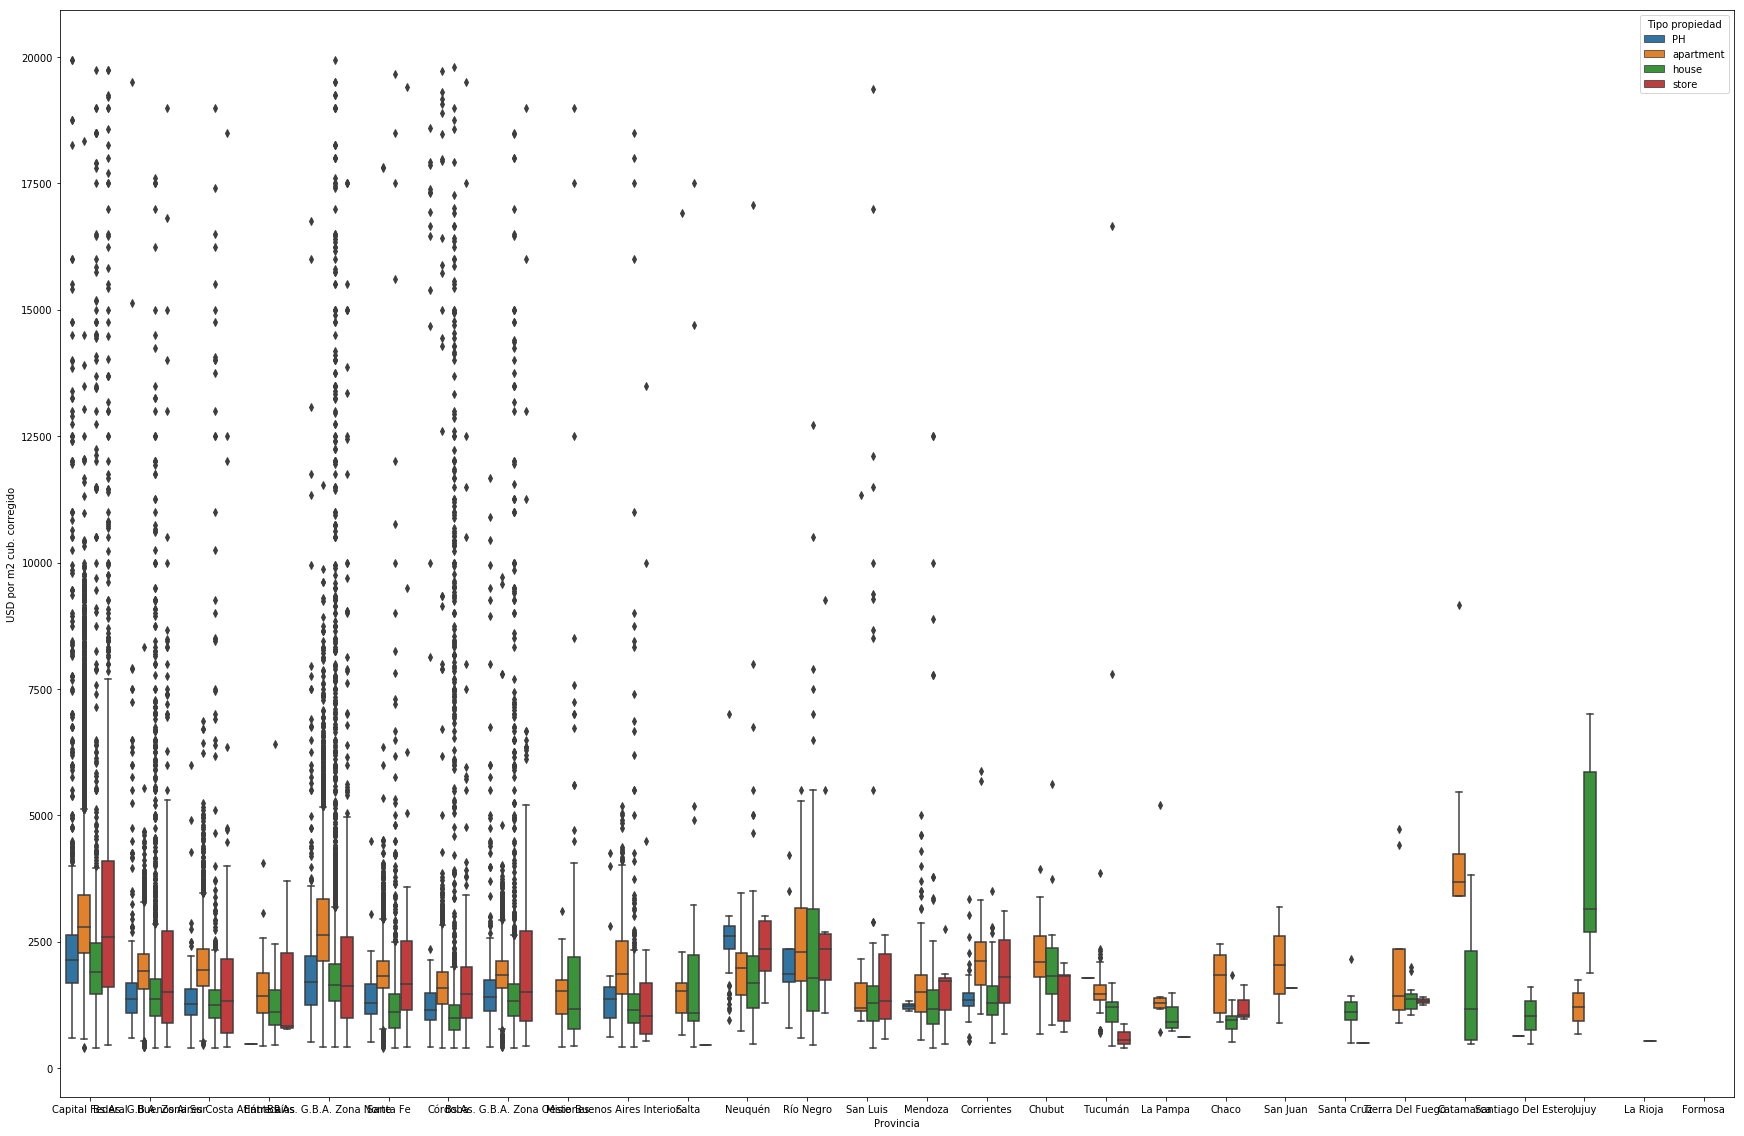

In [66]:
plt.figure(figsize=(30,20))
sns.boxplot(data=df_properatti_final,x='Provincia',y='USD por m2 cub. corregido',hue='Tipo propiedad')